# Opdracht 4.3: ZTDL 3 – Machine Learning
 De eenvoudigste vorm van Machine Learning is Lineaire Regressie. In het eerste deel van het
 notebook wordt uitgelegd hoe je dit met analytische code kunt doen. Je mag dit deel overslaan en
 doorgaan naar de paragraaf Linear Regression with Keras omdat wij ons in deze module willen
 richten op Neurale Netwerken.

We beschouwen in deze opdracht (alleen) de paragraaf Linear Regression with Keras
- Neem het Jupyter Notebook over in een nieuw eigen Notebook

- Zoek op het Internet een andere dataset dan hier besproken die geschikt is om lineraire
    regressie op toe te passen.
- Pas lineaire regressie toe op de gevonden dataset.
- Plaats commentaar bij de code zodat de werking van het programma op hoofdlijnen duidelijk
wordt.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../datasets/cast/bottle.csv")

df.head()

C:\Anacondont\envs\machineLearningP4\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df1 = df[df['Btl_Cnt'].between(19, 98)]
df1.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
18,1,19,054.0 056.0,19-4903CR-HY-060-0930-05400560-0250A-7,250,8.26,33.926,NaN,26.396,NaN,...,NaN,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1,20,054.0 056.0,19-4903CR-HY-060-0930-05400560-0285A-3,285,7.96,33.980,NaN,26.483,NaN,...,NaN,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1,21,054.0 056.0,19-4903CR-HY-060-0930-05400560-0300A-7,300,7.77,33.990,NaN,26.519,NaN,...,NaN,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,1,22,054.0 056.0,19-4903CR-HY-060-0930-05400560-0373A-3,373,6.80,34.040,NaN,26.695,NaN,...,NaN,376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1,23,054.0 056.0,19-4903CR-HY-060-0930-05400560-0400A-7,400,6.55,34.056,NaN,26.741,NaN,...,NaN,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


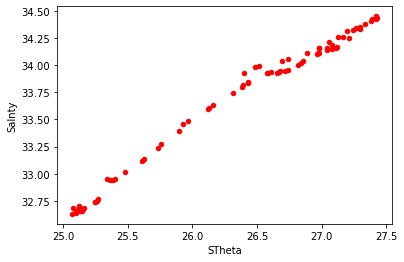

In [39]:
df1.plot.scatter(x='STheta', y='Salnty', c='r'); #Zonder lineare regressie

In [40]:
def line(x, w=0, b=0):
    return x * w + b

In [41]:
x = np.linspace(24.6, 28, 200);

In [42]:
x

array([24.6       , 24.61708543, 24.63417085, 24.65125628, 24.66834171,
       24.68542714, 24.70251256, 24.71959799, 24.73668342, 24.75376884,
       24.77085427, 24.7879397 , 24.80502513, 24.82211055, 24.83919598,
       24.85628141, 24.87336683, 24.89045226, 24.90753769, 24.92462312,
       24.94170854, 24.95879397, 24.9758794 , 24.99296482, 25.01005025,
       25.02713568, 25.04422111, 25.06130653, 25.07839196, 25.09547739,
       25.11256281, 25.12964824, 25.14673367, 25.1638191 , 25.18090452,
       25.19798995, 25.21507538, 25.2321608 , 25.24924623, 25.26633166,
       25.28341709, 25.30050251, 25.31758794, 25.33467337, 25.35175879,
       25.36884422, 25.38592965, 25.40301508, 25.4201005 , 25.43718593,
       25.45427136, 25.47135678, 25.48844221, 25.50552764, 25.52261307,
       25.53969849, 25.55678392, 25.57386935, 25.59095477, 25.6080402 ,
       25.62512563, 25.64221106, 25.65929648, 25.67638191, 25.69346734,
       25.71055276, 25.72763819, 25.74472362, 25.76180905, 25.77

In [43]:
yhat = line(x, 0, 0)

In [44]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

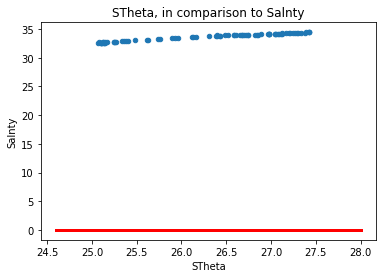

In [45]:
df1.plot(kind='scatter',
        x='STheta',
        y='Salnty',
        title='STheta, in comparison to Salnty')
plt.plot(x, yhat, color='red', linewidth=3)

In [46]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [47]:
X = df1['STheta'].values
y_true = df1['Salnty'].values

In [48]:
print(y_true)

[33.926 33.98  33.99  34.04  34.056 34.113 34.16  34.161 34.21  34.261
 34.31  32.95  32.94  32.939 32.95  33.013 33.24  33.272 33.46  33.488
 33.6   33.631 33.745 33.8   33.833 33.93  33.939 33.943 33.95  33.957
 34.    34.016 34.101 34.16  34.188 34.259 34.319 34.34  34.354 34.378
 34.403 34.429 34.43  32.63  32.66  32.66  32.66  32.673 32.68  32.75
 32.736 32.66  32.74  32.765 33.12  33.132 33.398 33.605 33.82  33.844
 33.926 33.93  33.941 34.041 34.11  34.113 34.135 34.151 34.16  34.169
 34.252 34.336 34.421 34.45  32.68  32.7   32.694 32.66  32.657 32.641]


In [49]:
print(X)

[26.396 26.483 26.519 26.695 26.741 26.885 26.98  26.982 27.054 27.128
 27.198 25.335 25.363 25.385 25.404 25.48  25.732 25.76  25.926 25.962
 26.121 26.162 26.312 26.386 26.432 26.581 26.606 26.68  26.72  26.738
 26.816 26.841 26.965 27.044 27.079 27.168 27.243 27.269 27.294 27.337
 27.381 27.423 27.425 25.069 25.117 25.134 25.136 25.15  25.163 25.259
 25.242 25.143 25.247 25.271 25.612 25.624 25.899 26.126 26.392 26.43
 26.586 26.651 26.672 26.856 26.972 26.98  27.041 27.084 27.11  27.12
 27.209 27.3   27.39  27.421 25.074 25.12  25.119 25.103 25.1   25.1  ]


In [50]:
y_pred = line(X, 1.26, 0.8)

In [51]:
y_pred

array([34.05896, 34.16858, 34.21394, 34.4357 , 34.49366, 34.6751 ,
       34.7948 , 34.79732, 34.88804, 34.98128, 35.06948, 32.7221 ,
       32.75738, 32.7851 , 32.80904, 32.9048 , 33.22232, 33.2576 ,
       33.46676, 33.51212, 33.71246, 33.76412, 33.95312, 34.04636,
       34.10432, 34.29206, 34.32356, 34.4168 , 34.4672 , 34.48988,
       34.58816, 34.61966, 34.7759 , 34.87544, 34.91954, 35.03168,
       35.12618, 35.15894, 35.19044, 35.24462, 35.30006, 35.35298,
       35.3555 , 32.38694, 32.44742, 32.46884, 32.47136, 32.489  ,
       32.50538, 32.62634, 32.60492, 32.48018, 32.61122, 32.64146,
       33.07112, 33.08624, 33.43274, 33.71876, 34.05392, 34.1018 ,
       34.29836, 34.38026, 34.40672, 34.63856, 34.78472, 34.7948 ,
       34.87166, 34.92584, 34.9586 , 34.9712 , 35.08334, 35.198  ,
       35.3114 , 35.35046, 32.39324, 32.4512 , 32.44994, 32.42978,
       32.426  , 32.426  ])

## Linear regressie d.m.v. Keras

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [64]:
model = Sequential()

model.add(Dense(1, input_shape=(1,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(Adam(learning_rate=0.05), 'mean_squared_error', metrics=['accuracy'])

In [84]:
np.any(np.isnan(y_true))

False

In [85]:
model.fit(X, y_true, epochs=80) #150 iteraties het model de loss laten bepalen, deze moet zo klein mogelijk.

Epoch 1/80
3/3 [==============================] - 1s 2ms/step - loss: 0.6707 - accuracy: 0.0000e+00
Epoch 2/80
3/3 [==============================] - 0s 2ms/step - loss: 0.5944 - accuracy: 0.0000e+00
Epoch 3/80
3/3 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.0000e+00
Epoch 4/80
3/3 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.0000e+00
Epoch 5/80
3/3 [==============================] - 0s 2ms/step - loss: 0.1503 - accuracy: 0.0000e+00
Epoch 6/80
3/3 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.0000e+00
Epoch 7/80
3/3 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.0000e+00
Epoch 8/80
3/3 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.0000e+00
Epoch 9/80
3/3 [==============================] - 0s 2ms/step - loss: 0.1258 - accuracy: 0.0000e+00
Epoch 10/80
3/3 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.0000e+00

In [86]:
y_pred = model.predict(X)

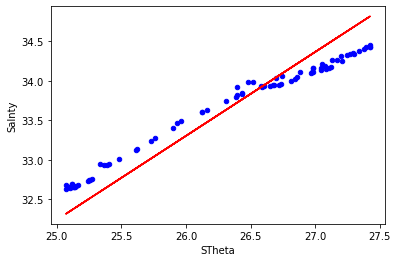

In [87]:
#De te bekijken dataset
df1.plot.scatter(x='STheta', y='Salnty', c='blue')

#De predicted linear regression van deze datapunten
plt.plot(X, y_pred, 'r')

#Dit grafiek is het meest accurate wat we uit dit model konden krijgen
#Conclusie is dat de dataset niet echt goede waardes heeft om linear regressie op toe te passen